## Exploratory data analysis(EDA)

The dataset is from kaggle. It contains general information about the top youtube channels. 

Dataset available at : https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

In [1]:
#!pip install matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#pip list

#WHAT

In [3]:
import pandas as pd

#visualization libraries
#!pip install matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.io as pio
#!pip install seaborn
import seaborn as sns




In [4]:
data_import = pd.read_csv('most_subscribed_youtube_channels.csv', delimiter = ',', thousands = ',')
data_import

rank                    Youtuber  subscribers   video views  video count  \
0       1                    T-Series    222000000  198459090822        17317   
1       2              YouTube Movies    154000000             0            0   
2       3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
3       4                   SET India    139000000  125764252686        91271   
4       5                       Music    116000000             0            0   
..    ...                         ...          ...           ...          ...   
995   996                    JP Plays     10900000    4609300218         3528   
996   997               TrapMusicHDTV     10900000    4070521973          690   
997   998                 Games EduUu     10900000    3093784767         1006   
998   999                       Hueva     10900000    3040301750          831   
999  1000              Dobre Brothers     10900000    2808411693          590   

             category  started  
0               Music     2006  
1    Film & Animation     2015  
2           Education     2006  
3               Shows     2006  
4                 NaN     2013  
..                ...      ...  
995            Gaming     2014  
996             Music     2013  
997            Gaming     2011  
998            Gaming     2012  
999    People & Blogs     2017  

[1000 rows x 7 columns]

In [5]:
data_import.dtypes

rank            int64
Youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

The above shows that "subscibers and video views are treated as objects instead of integers. i will hence convert them to integers

In [6]:
data_import['subscribers'] = data_import['subscribers'].astype(float)
data_import['video views'] = data_import['video views'].astype(float)
data_import['video count'] = data_import['video count'].astype(float)
data_import.dtypes

rank             int64
Youtuber        object
subscribers    float64
video views    float64
video count    float64
category        object
started          int64
dtype: object

The table also show numerous NaN values. i will take a closer look at those

In [7]:
# First i identity columns with null values
data_import.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

Only the category columns contains NaN values. I identify those below. 

In [8]:
# creating a bool series True of False for NaN values
df_series = pd.isnull(data_import['category'])

# filtering data only with category NaN
u = data_import[df_series]

In [9]:
u.shape

(27, 7)

In [10]:
# i take only columns without null values
# data_import.notnull()

df_clean = pd.notnull(data_import['category'])
df_final =data_import[df_clean]
df_final


rank                    Youtuber  subscribers   video views  video count  \
0       1                    T-Series  222000000.0  1.984591e+11      17317.0   
1       2              YouTube Movies  154000000.0  0.000000e+00          0.0   
2       3  Cocomelon - Nursery Rhymes  140000000.0  1.354813e+11        786.0   
3       4                   SET India  139000000.0  1.257643e+11      91271.0   
5       6                   PewDiePie  111000000.0  2.846946e+10       4497.0   
..    ...                         ...          ...           ...          ...   
995   996                    JP Plays   10900000.0  4.609300e+09       3528.0   
996   997               TrapMusicHDTV   10900000.0  4.070522e+09        690.0   
997   998                 Games EduUu   10900000.0  3.093785e+09       1006.0   
998   999                       Hueva   10900000.0  3.040302e+09        831.0   
999  1000              Dobre Brothers   10900000.0  2.808412e+09        590.0   

             category  started  
0               Music     2006  
1    Film & Animation     2015  
2           Education     2006  
3               Shows     2006  
5              Gaming     2010  
..                ...      ...  
995            Gaming     2014  
996             Music     2013  
997            Gaming     2011  
998            Gaming     2012  
999    People & Blogs     2017  

[973 rows x 7 columns]

In [11]:
df_final.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

checking for duplicate rows

In [12]:
duplicate = df_final[df_final.duplicated()].sum()
print('Duplicate Rows:')
duplicate

# the result below confirms there are no duplicate rows

Duplicate Rows:


rank           0.0
Youtuber       0.0
subscribers    0.0
video views    0.0
video count    0.0
category       0.0
started        0.0
dtype: float64

In [13]:
df_final.nunique()

rank           973
Youtuber       972
subscribers    282
video views    972
video count    845
category        18
started         18
dtype: int64

Now we can check some descriptive statistics of each columns with ".describe"

In [14]:
df_final.describe(include = 'all')

rank            Youtuber   subscribers   video views  \
count    973.000000                 973  9.730000e+02  9.730000e+02   
unique          NaN                 972           NaN           NaN   
top             NaN  Bollywood Classics           NaN           NaN   
freq            NaN                   2           NaN           NaN   
mean     500.763618                 NaN  2.036639e+07  9.306726e+09   
std      287.475423                 NaN  1.538813e+07  1.218412e+10   
min        1.000000                 NaN  1.090000e+07  0.000000e+00   
25%      252.000000                 NaN  1.270000e+07  3.631748e+09   
50%      501.000000                 NaN  1.550000e+07  6.165703e+09   
75%      748.000000                 NaN  2.200000e+07  1.147036e+10   
max     1000.000000                 NaN  2.220000e+08  1.984591e+11   

          video count       category      started  
count      973.000000            973   973.000000  
unique            NaN             18          NaN  
top               NaN  Entertainment          NaN  
freq              NaN            241          NaN  
mean      8776.802672            NaN  2012.267215  
std      29733.093888            NaN     3.973747  
min          0.000000            NaN  1970.000000  
25%        347.000000            NaN  2009.000000  
50%        899.000000            NaN  2013.000000  
75%       3150.000000            NaN  2015.000000  
max     329711.000000            NaN  2021.000000

I can find the most popular youtube channels by sorting the subscribers column in descending order.
then we look at the top 20 or 50 youtube channesl.

In [15]:
subscribers = df_final.sort_values(by ='subscribers', ascending = False)
subscribers.head(20)

rank                    Youtuber  subscribers   video views  video count  \
0      1                    T-Series  222000000.0  1.984591e+11      17317.0   
1      2              YouTube Movies  154000000.0  0.000000e+00          0.0   
2      3  Cocomelon - Nursery Rhymes  140000000.0  1.354813e+11        786.0   
3      4                   SET India  139000000.0  1.257643e+11      91271.0   
5      6                   PewDiePie  111000000.0  2.846946e+10       4497.0   
6      7                     MrBeast  102000000.0  1.683246e+10        726.0   
7      8           ✿ Kids Diana Show   99700000.0  7.960229e+10       1009.0   
8      9                 Like Nastya   99200000.0  8.196385e+10        702.0   
10    11                         WWE   90200000.0  7.054474e+10      63077.0   
11    12           Zee Music Company   86700000.0  4.906771e+10       6603.0   
12    13               Vlad and Niki   85100000.0  6.649876e+10        472.0   
13    14             5-Minute Crafts   77100000.0  2.388146e+10       5581.0   
14    15                   BLACKPINK   76200000.0  2.470742e+10        397.0   
16    17                   Goldmines   74100000.0  1.853309e+10       3968.0   
17    18                    Sony SAB   70600000.0  8.247358e+10      56295.0   
18    19                   BANGTANTV   70000000.0  1.747109e+10       1787.0   
19    20               Justin Bieber   69700000.0  2.856724e+10        247.0   
20    21                 HYBE LABELS   67800000.0  2.401385e+10        971.0   
21    22             Canal KondZilla   65900000.0  3.657670e+10       2313.0   
22    23                      Zee TV   63000000.0  1.711158e+10      60802.0   

            category  started  
0              Music     2006  
1   Film & Animation     2015  
2          Education     2006  
3              Shows     2006  
5             Gaming     2010  
6      Entertainment     2012  
7     People & Blogs     2015  
8     People & Blogs     2016  
10            Sports     2007  
11             Music     2014  
12     Entertainment     2018  
13     Howto & Style     2016  
14    People & Blogs     2016  
16  Film & Animation     2012  
17             Shows     2007  
18             Music     2012  
19             Music     2007  
20             Music     2008  
21             Music     2012  
22     Entertainment     2005

I can find the top 20 channels with most video views

In [16]:
video_views = df_final.sort_values(by ='video views', ascending = False)
video_views.head(20)

rank                                       Youtuber  subscribers  \
0       1                                       T-Series  222000000.0   
2       3                     Cocomelon - Nursery Rhymes  140000000.0   
3       4                                      SET India  139000000.0   
17     18                                       Sony SAB   70600000.0   
8       9                                    Like Nastya   99200000.0   
7       8                              ✿ Kids Diana Show   99700000.0   
10     11                                            WWE   90200000.0   
12     13                                  Vlad and Niki   85100000.0   
27     28                                     Movieclips   57600000.0   
29     30                                      Colors TV   55100000.0   
104   105                                   Ryan's World   32900000.0   
233   234                                     netd müzik   22800000.0   
37     38                              El Reino Infantil   51700000.0   
11     12                              Zee Music Company   86700000.0   
61     62                          ABS-CBN Entertainment   40600000.0   
79     80                                Toys and Colors   36500000.0   
26     27          ChuChu TV Nursery Rhymes & Kids Songs   57700000.0   
87     88                Super Simple Songs - Kids Songs   35300000.0   
30     31                                     Wave Music   53400000.0   
65     66  Little Baby Bum - Nursery Rhymes & Kids Songs   39500000.0   

      video views  video count          category  started  
0    1.984591e+11      17317.0             Music     2006  
2    1.354813e+11        786.0         Education     2006  
3    1.257643e+11      91271.0             Shows     2006  
17   8.247358e+10      56295.0             Shows     2007  
8    8.196385e+10        702.0    People & Blogs     2016  
7    7.960229e+10       1009.0    People & Blogs     2015  
10   7.054474e+10      63077.0            Sports     2007  
12   6.649876e+10        472.0     Entertainment     2018  
27   5.883982e+10      39202.0  Film & Animation     2006  
29   5.261150e+10      87427.0             Shows     2008  
104  5.172173e+10       2198.0     Entertainment     2015  
233  5.065893e+10      20482.0             Music     2014  
37   4.989525e+10       1309.0             Music     2011  
11   4.906771e+10       6603.0             Music     2014  
61   4.754424e+10     179522.0    People & Blogs     2008  
79   4.093258e+10        821.0     Entertainment     2016  
26   3.926665e+10        506.0         Education     2013  
87   3.744087e+10        600.0         Education     2006  
30   3.723088e+10      18622.0             Music     2014  
65   3.713607e+10       1989.0         Education     2011

In [17]:
video_count = df_final.sort_values(by ='video count', ascending = False)
video_count.head(20)

rank               Youtuber  subscribers   video views  video count  \
815   816               GMA News   12100000.0  1.047168e+10     329711.0   
112   113                IndiaTV   31900000.0  1.341704e+10     237971.0   
777   778               KOMPASTV   12400000.0  9.025461e+09     225232.0   
100   101               ABP NEWS   33200000.0  1.042146e+10     224455.0   
576   577        Thairath Online   14500000.0  1.199592e+10     209097.0   
32     33                Aaj Tak   52900000.0  2.020494e+10     196497.0   
897   898        TV9 Bharatvarsh   11500000.0  7.314674e+09     193940.0   
84     85             TEDx Talks   35900000.0  6.660398e+09     185006.0   
61     62  ABS-CBN Entertainment   40600000.0  4.754424e+10     179522.0   
616   617           ABS-CBN News   14100000.0  9.438904e+09     174684.0   
500   501                 News24   15500000.0  5.982444e+09     157377.0   
617   618                    CNN   14100000.0  1.208328e+10     155569.0   
829   830               Geo News   12000000.0  5.358131e+09     153929.0   
885   886                eltrece   11600000.0  1.110610e+10     149786.0   
429   430                    IGN   16800000.0  1.463392e+10     149770.0   
227   228                ABPLIVE   23200000.0  6.805551e+09     146479.0   
168   169               Zee News   26700000.0  1.217585e+10     144314.0   
944   945      AlArabiya العربية   11200000.0  5.892643e+09     129135.0   
91     92                  one31   34400000.0  2.696917e+10     128901.0   
830   831                   NDTV   12000000.0  4.510236e+09     126906.0   

                  category  started  
815        News & Politics     2007  
112        News & Politics     2006  
777        News & Politics     2013  
100         People & Blogs     2012  
576        News & Politics     2010  
32         News & Politics     2009  
897         People & Blogs     2018  
84   Nonprofits & Activism     2009  
61          People & Blogs     2008  
616        News & Politics     2009  
500        News & Politics     2014  
617        News & Politics     2005  
829        News & Politics     2007  
885          Entertainment     2014  
429                 Gaming     2006  
227         People & Blogs     2017  
168        News & Politics     2007  
944         People & Blogs     2006  
91           Entertainment     2013  
830          Entertainment     2006

From the result above we can already see that the category News & politics have the most number of videos,
followed by people & blogs, entertainment and gaming. Now i find the number of youtube channels for each category and the number of channels created per year. This can be done in the following way.

In [18]:
df_final['category'].value_counts()
# to convert to a dataframe
num_channels_per_category = df_final['category'].value_counts().to_frame(name = 'category')
num_channels_per_category

category
Entertainment               241
Music                       222
People & Blogs              119
Gaming                      102
Comedy                       63
Film & Animation             52
Education                    46
Howto & Style                45
News & Politics              27
Science & Technology         18
Shows                        14
Sports                       10
Pets & Animals                6
Trailers                      2
Nonprofits & Activism         2
Movies                        2
Autos & Vehicles              1
Travel & Events               1

In [19]:
df_final['started'].value_counts()
# to convert to a dataframe
created_per_year = df_final['started'].value_counts().to_frame(name = 'started')
created_per_year

started
2014      119
2011       93
2015       92
2013       86
2012       83
2016       75
2006       72
2009       63
2017       60
2010       47
2007       45
2008       45
2018       39
2005       22
2019       17
2020       10
2021        4
1970        1

An advanced way to do this is the following:

In [20]:
dic_df2 = {}
for var in {'category', 'started'}:
    dic_df2[var]=pd.DataFrame(df_final[var].value_counts())


num_channels_per_category = dic_df2['category']
num_channels_per_category

created_per_year = dic_df2['started']
created_per_year

started
2014      119
2011       93
2015       92
2013       86
2012       83
2016       75
2006       72
2009       63
2017       60
2010       47
2007       45
2008       45
2018       39
2005       22
2019       17
2020       10
2021        4
1970        1

Now lets rename, reset the index and sort the columns of **created_per year** in descending order.

In [21]:
created_per_year.reset_index(inplace = True)
created_per_year = created_per_year.rename(columns = {'index':'started_year','started':'count' })

created_per_year = created_per_year.sort_values(by = 'started_year', ascending = True)
created_per_year

started_year  count
17          1970      1
13          2005     22
6           2006     72
10          2007     45
11          2008     45
7           2009     63
9           2010     47
1           2011     93
4           2012     83
3           2013     86
0           2014    119
2           2015     92
5           2016     75
8           2017     60
12          2018     39
14          2019     17
15          2020     10
16          2021      4

plotting a quick histogram to see what it looks like

The barchart below represents the number of youtube channels created per year.

<AxesSubplot:ylabel='started_year'>

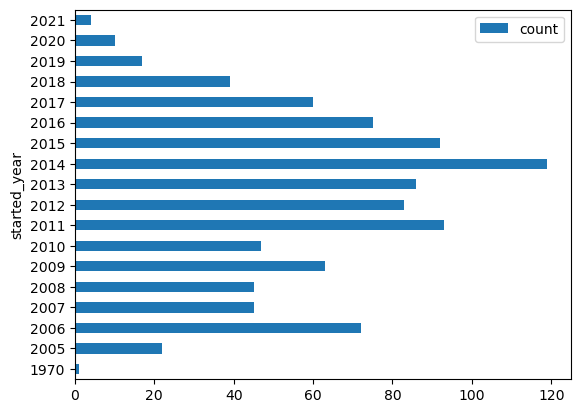

In [22]:
created_per_year.plot.barh(y ='count',x ='started_year' )

a better plot is the one below.

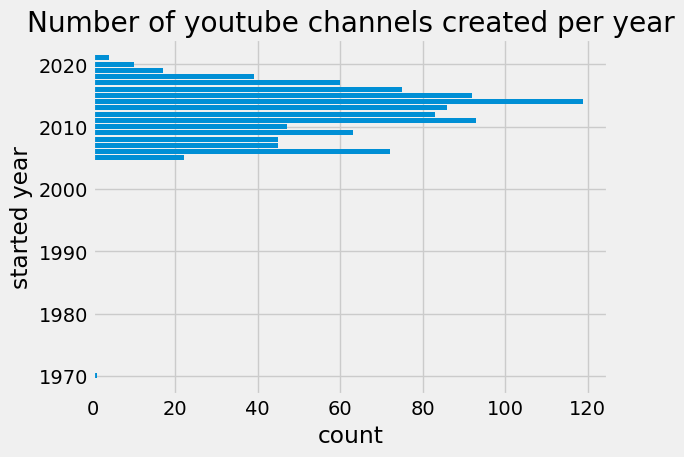

In [23]:
plt.style.use('fivethirtyeight')
# cat_per_channels.plot.barh(x ='category', y = 'count')
plt.barh(created_per_year['started_year'], created_per_year['count'])
plt.title("Number of youtube channels created per year")
plt.ylabel('started year')
plt.xlabel('count')


plt.tight_layout() 
# plt.show()

Now lets rename, reset the index and sort the columns of **num_channels_per_category** in ascending order.

In [24]:
num_channels_per_category.reset_index(inplace = True)
num_channels_per_category  = num_channels_per_category.rename(columns ={'index': 'category','category':'count' })
num_channels_per_category = num_channels_per_category.sort_values(by ='count', ascending = True)
num_channels_per_category

category  count
17        Travel & Events      1
16       Autos & Vehicles      1
15                 Movies      2
14  Nonprofits & Activism      2
13               Trailers      2
12         Pets & Animals      6
11                 Sports     10
10                  Shows     14
9    Science & Technology     18
8         News & Politics     27
7           Howto & Style     45
6               Education     46
5        Film & Animation     52
4                  Comedy     63
3                  Gaming    102
2          People & Blogs    119
1                   Music    222
0           Entertainment    241

plotting the above the above

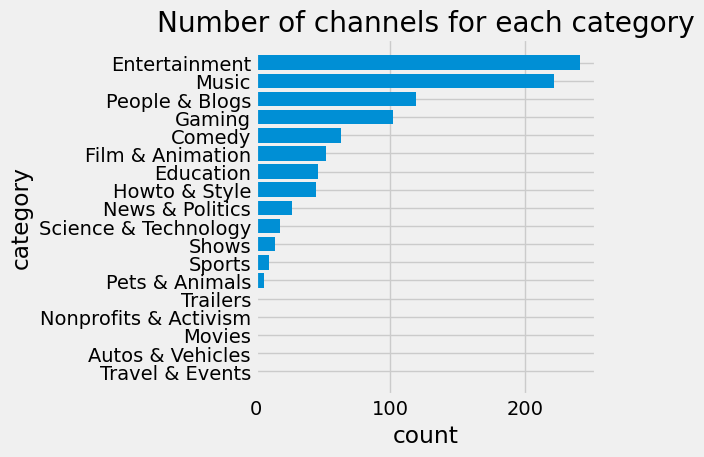

In [25]:
plt.style.use('fivethirtyeight')
# cat_per_channels.plot.barh(x ='category', y = 'count')
plt.barh(num_channels_per_category['category'], num_channels_per_category['count'])
plt.title("Number of channels for each category")
plt.ylabel('category')
plt.xlabel('count')


plt.tight_layout() 
plt.show()

Let's do a donut chart to better observe the proportion of each category. the library `plotly` was used to better observe the proportions

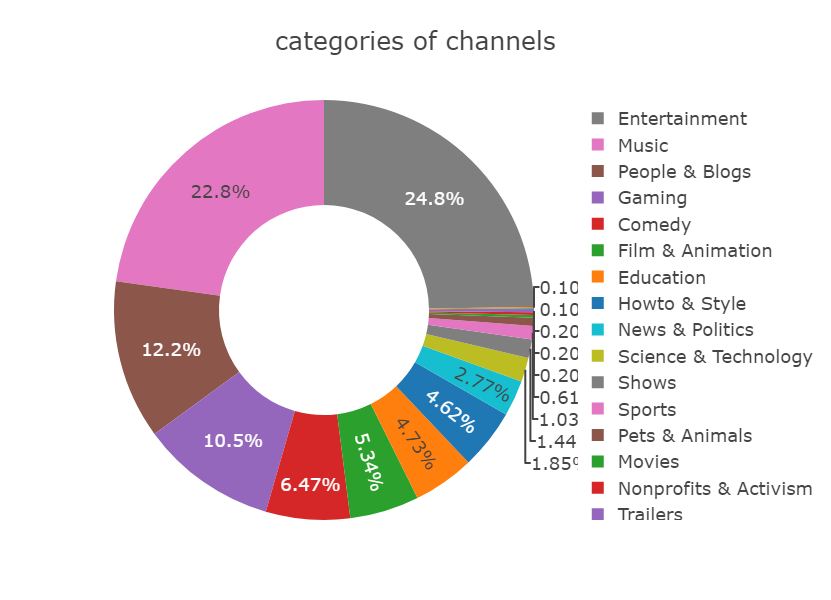

In [26]:
pie_chart = px.pie(
        data_frame=num_channels_per_category,
        values='count',
        names='category',
        color='category',                      #differentiate markers (discrete) by color
                                               # color_discrete_sequence= px.colors.sequential.Plasma_r, #["red","green","blue","orange"],     #set marker colors
                                               #color_discrete_map={"WA":"yellow","CA":"red","NY":"black","FL":"brown"},
        hover_name='category',                 #values appear in bold in the hover tooltip
        # hover_data=['positive'],             #values appear as extra data in the hover tooltip
        # custom_data=['total'],               #values are extra data to be used in Dash callbacks
        labels={"category":"category"},        #map the labels
        title='categories of channels',        #figure title
        template='presentation',               #'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                               #'plotly_white', 'plotly_dark', 'presentation',
                                               #'xgridoff', 'ygridoff', 'gridon', 'none'
        width=1000,                            #figure width in pixels
        height=600,                            #figure height in pixels
        hole=0.5,                              #represents the hole in middle of pie
        )

# pie_chart.update_traces(textposition='inside', textinfo='percent+label',
#                         marker=dict(line=dict(color='#000000', width=1)),
#                         pull=[0, 0, 0.2, 0], opacity=0.7, rotation=180)



pio.show(pie_chart)

Let's take a quick look at a barchart of started_year 

<AxesSubplot:ylabel='started_year'>

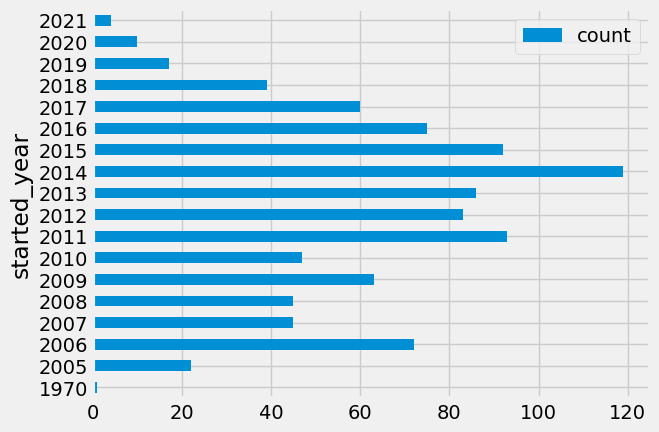

In [27]:
created_per_year.plot.barh(y ='count',x ='started_year' )

while we are at it let's do a point plot to show the number of channels created per year

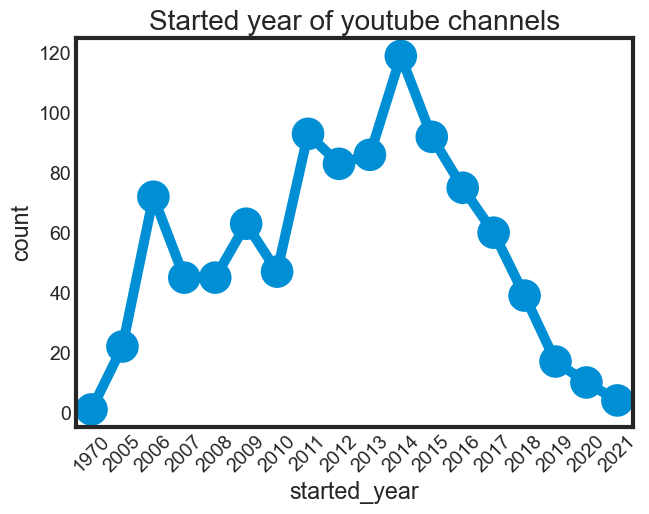

<Figure size 2000x800 with 0 Axes>

In [28]:
sns.set_style("ticks")
sns.pointplot(x = 'started_year', y = 'count' , data =created_per_year )

plt.xticks(rotation = 45)

plt.title('Started year of youtube channels')
plt.figure(figsize = (20,8))


# fig.autofmt_xdate()

plt.tight_layout() 
plt.show()

The graph shows that the most number of youtube channels created was in 2014 and the least in 1970. 

So far everything looks good. We can find the mean subscribers, mean video counts and the mean video views  of all youtube channels per year and plot them on a shared axis.

First let's find the means

In [29]:
df_final.head()

rank                    Youtuber  subscribers   video views  video count  \
0     1                    T-Series  222000000.0  1.984591e+11      17317.0   
1     2              YouTube Movies  154000000.0  0.000000e+00          0.0   
2     3  Cocomelon - Nursery Rhymes  140000000.0  1.354813e+11        786.0   
3     4                   SET India  139000000.0  1.257643e+11      91271.0   
5     6                   PewDiePie  111000000.0  2.846946e+10       4497.0   

           category  started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
5            Gaming     2010

In [30]:
x = df_final.groupby('started').mean().reset_index()
x

started        rank   subscribers   video views   video count
0      1970  100.000000  3.330000e+07  2.725287e+09    540.000000
1      2005  423.590909  2.197273e+07  1.044777e+10  15480.409091
2      2006  426.625000  2.767361e+07  1.676924e+10  16612.625000
3      2007  466.866667  2.365111e+07  1.396931e+10  24476.800000
4      2008  452.533333  2.118222e+07  1.140225e+10  14807.333333
5      2009  468.460317  2.001111e+07  1.023113e+10  10564.380952
6      2010  532.127660  1.935957e+07  8.997569e+09   9957.319149
7      2011  485.204301  1.981720e+07  8.804918e+09   5772.118280
8      2012  482.493976  2.134217e+07  8.979822e+09   7296.301205
9      2013  484.662791  1.936860e+07  7.720775e+09   7964.267442
10     2014  532.226891  1.904790e+07  8.453754e+09   8370.806723
11     2015  543.358696  1.978913e+07  7.562500e+09   4283.760870
12     2016  497.800000  2.065600e+07  8.268083e+09   2647.613333
13     2017  536.533333  1.746833e+07  5.230756e+09   5168.783333
14     2018  565.948718  1.789231e+07  8.353569e+09   7586.179487
15     2019  641.529412  1.421176e+07  6.146606e+09   3677.647059
16     2020  573.800000  1.585000e+07  7.795733e+09   1385.000000
17     2021  698.000000  1.415000e+07  8.552476e+09    696.750000

Let's define a function to plot.

In [31]:
def pltplot(data, x_col, y_col,axis, color, title):
    sns.pointplot(data = data, x = x_col, y = y_col, ax=axis, color = color, ).set_title(title, size = 20)
    # plt.xticks(rotation = 45)

Alright now let's plot.

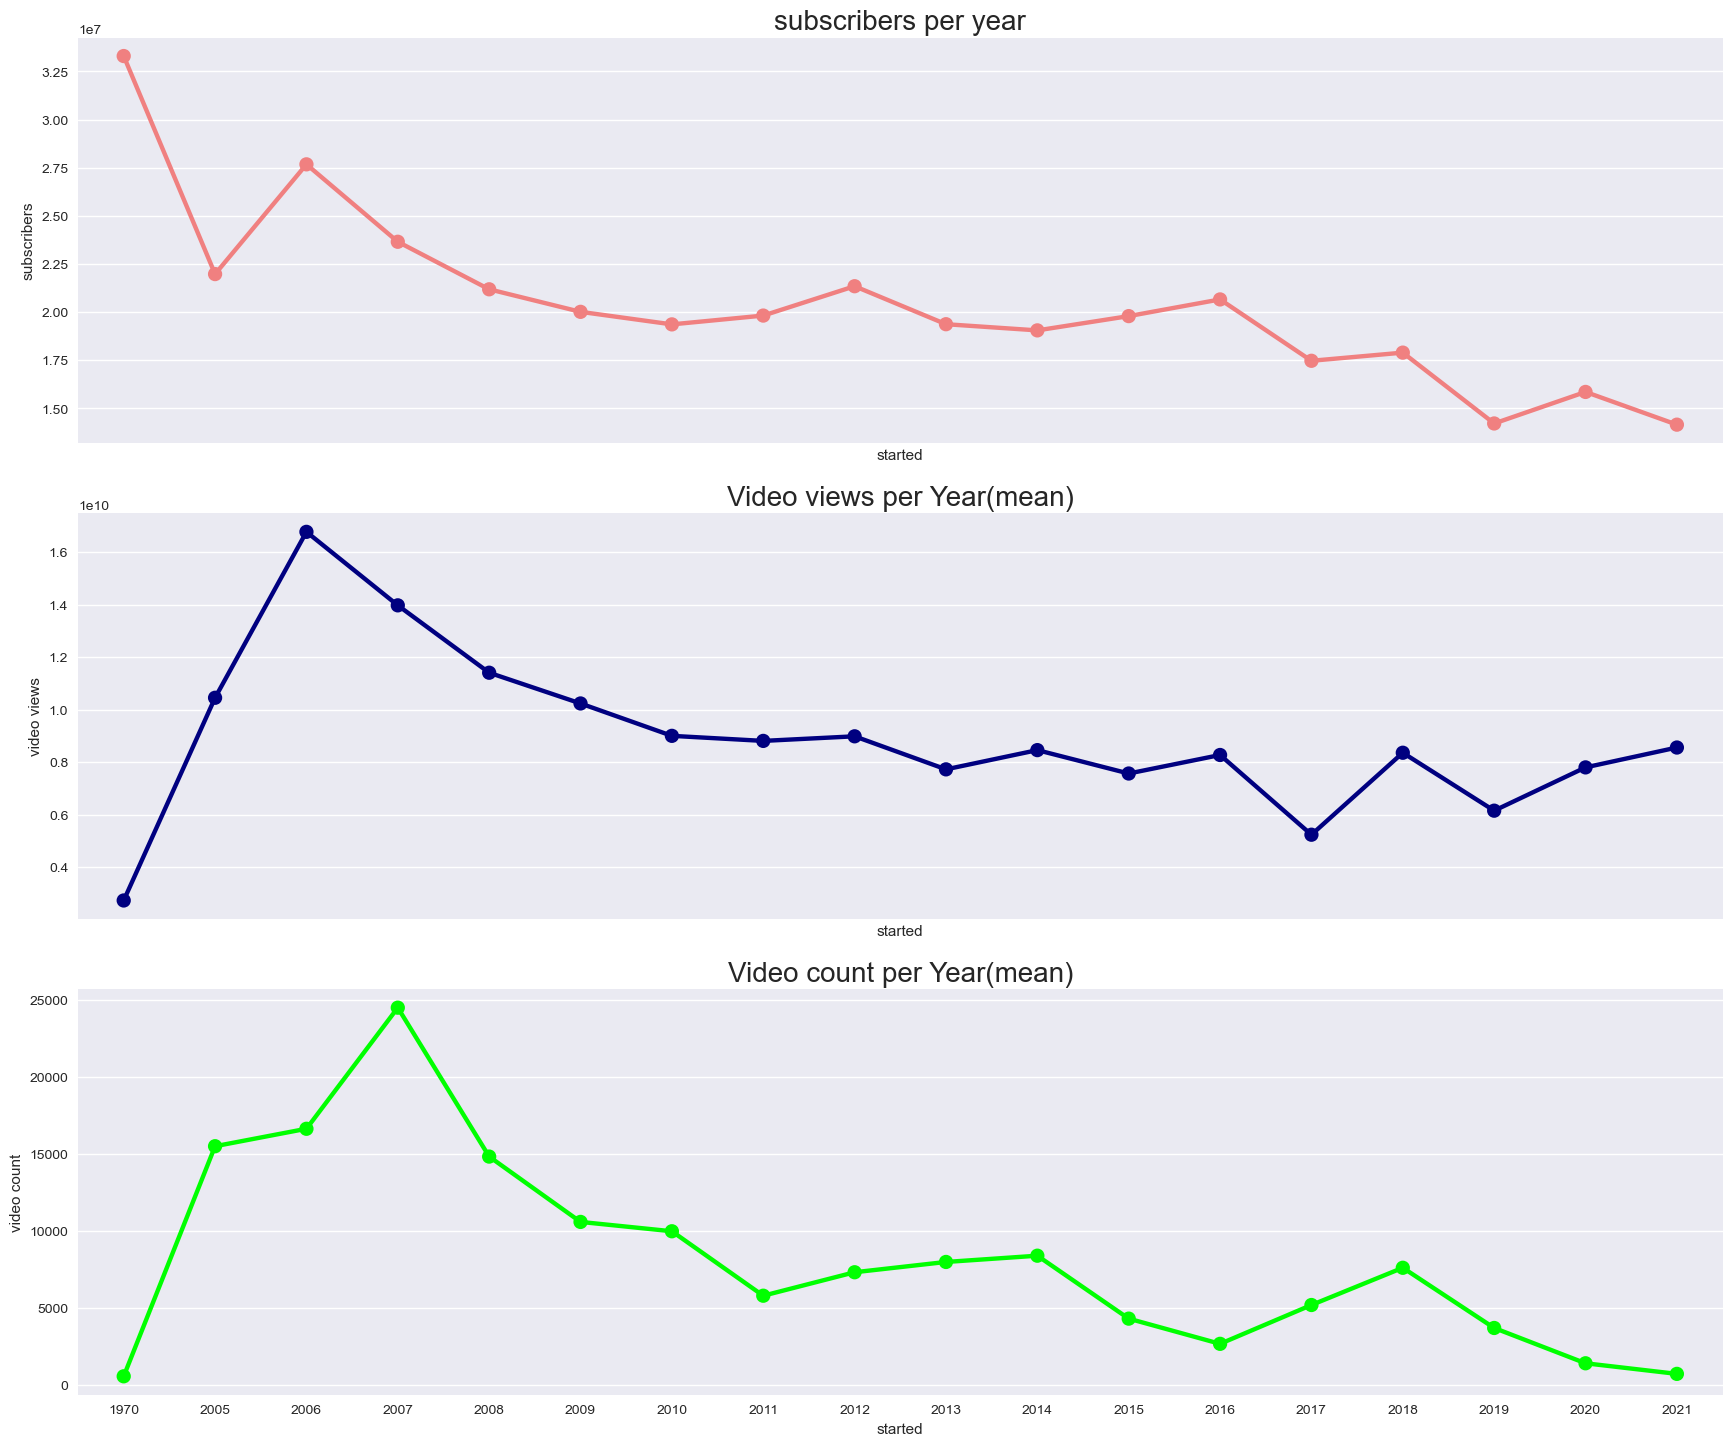

In [32]:
plt.style.use('seaborn')

fig, axes = plt.subplots(3,1, sharex= True , figsize = (18,15))
fig.tight_layout(pad=3.0) 


pltplot(x,x['started'], x['subscribers'],axes[0] , 'lightcoral','subscribers per year')
pltplot(x, x['started'], x['video views'], axes[1],'navy', 'Video views per Year(mean)')
pltplot(x, x['started'], x['video count'], axes[2],'lime', 'Video count per Year(mean)')



plt.savefig("pointplot")

finding the categories with the most subscribers

Text(0.5, 1.0, 'categories with the most subsricbers')

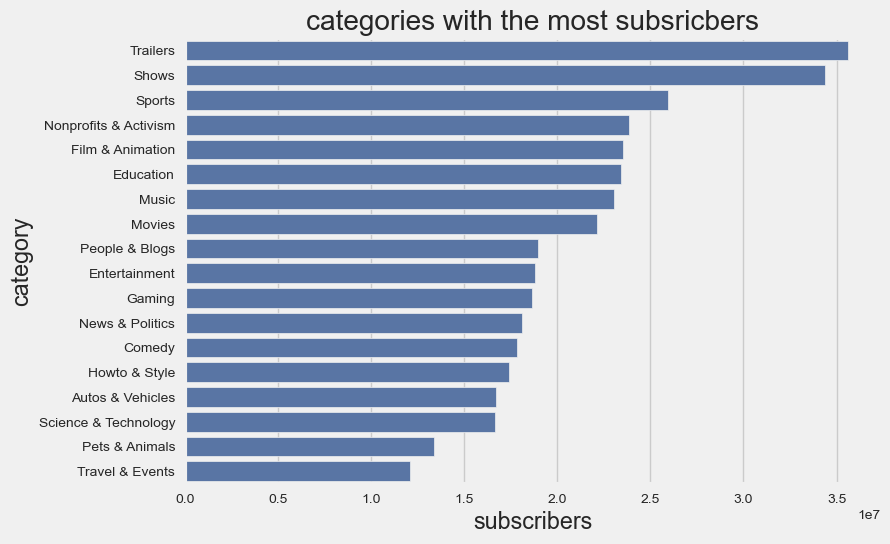

In [34]:
category_subscribers = df_final[['category', 'subscribers', 'video views', 'video count']].groupby('category').mean().reset_index().sort_values(by = 'subscribers', ascending =False)


plt.style.use('fivethirtyeight')
# sns.set_theme(style = 'white')
sns.set_color_codes('deep')
sns.barplot(x = 'subscribers', y = 'category', data = category_subscribers, color = 'b')

plt.title('categories with the most subsricbers')

category with the most video counts

Text(0.5, 1.0, 'Categories with the most video counts')

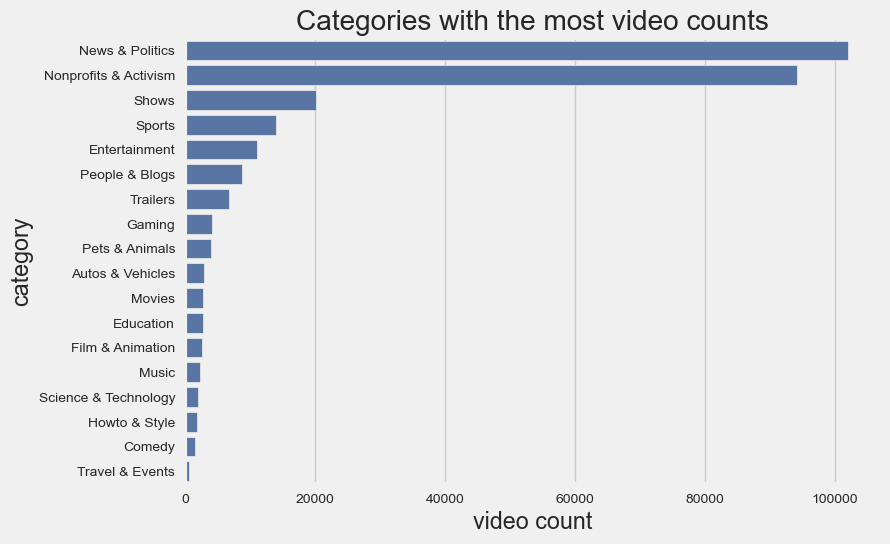

In [35]:
category_counts = df_final[['category', 'subscribers', 'video views', 'video count']].groupby('category').mean().reset_index().sort_values(by = 'video count', ascending =False)


plt.style.use('fivethirtyeight')
# sns.set_theme(style = 'white')
sns.set_color_codes('deep')
sns.barplot(x = 'video count', y = 'category', data = category_counts, color = 'b')

plt.title('Categories with the most video counts')

categories with the most video views

Text(0.5, 1.0, 'categories with the most video views')

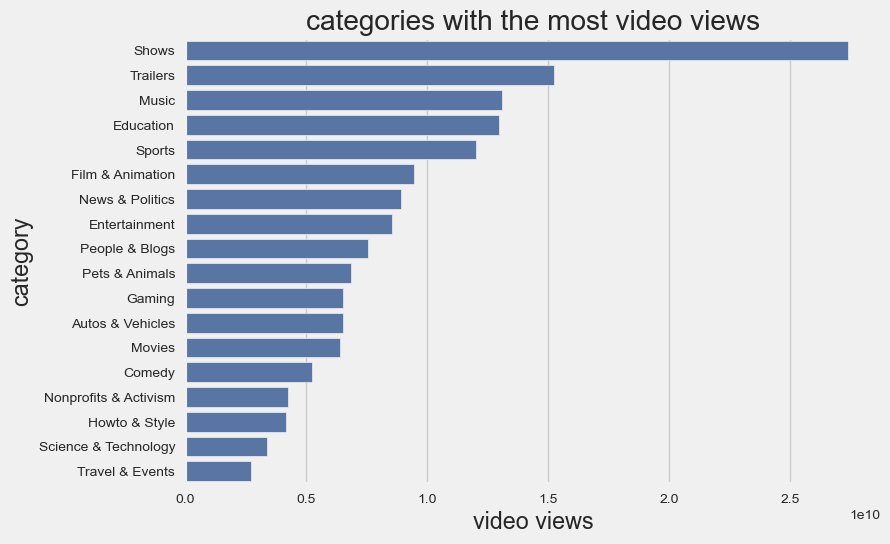

In [36]:
category_views = df_final[['category', 'subscribers', 'video views', 'video count']].groupby('category').mean().reset_index().sort_values(by = 'video views', ascending =False)


plt.style.use('fivethirtyeight')
# sns.set_theme(style = 'white')
sns.set_color_codes('deep')
sns.barplot(x = 'video views', y = 'category', data = category_views, color = 'b')

plt.title('categories with the most video views')

examing the relationship between video count and video views with a scatterplot

Text(0.5, 1.0, 'video counts vs video views')

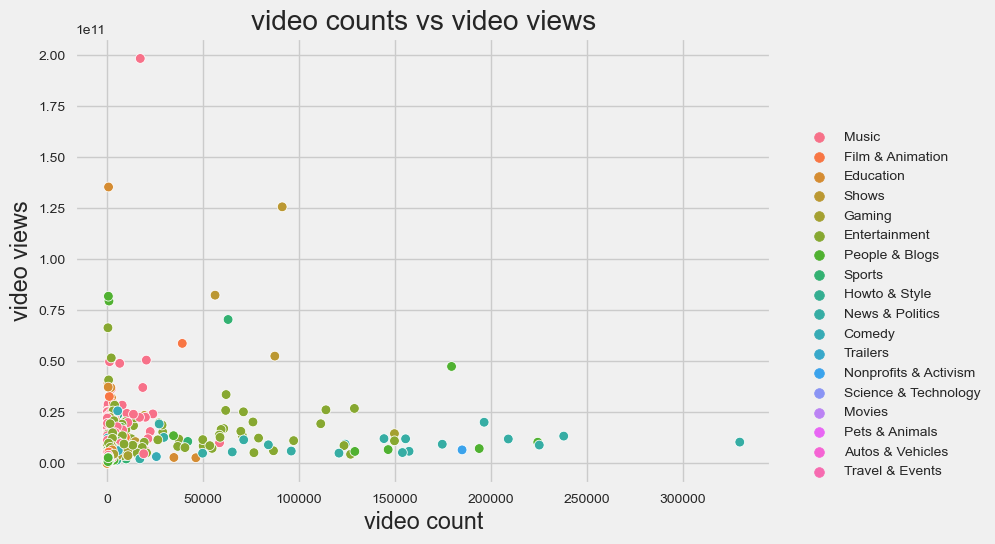

In [37]:
scatter1 = sns.scatterplot(x = df_final['video count'], y = df_final['video views'], data = df_final, hue = 'category', legend = True)
plt.legend(loc = (1.04, 0))
scatter1.set_title("video counts vs video views")



# there doesn't appear to be a relationship between the two variables

Text(0.5, 1.0, 'subscribers vs video count')

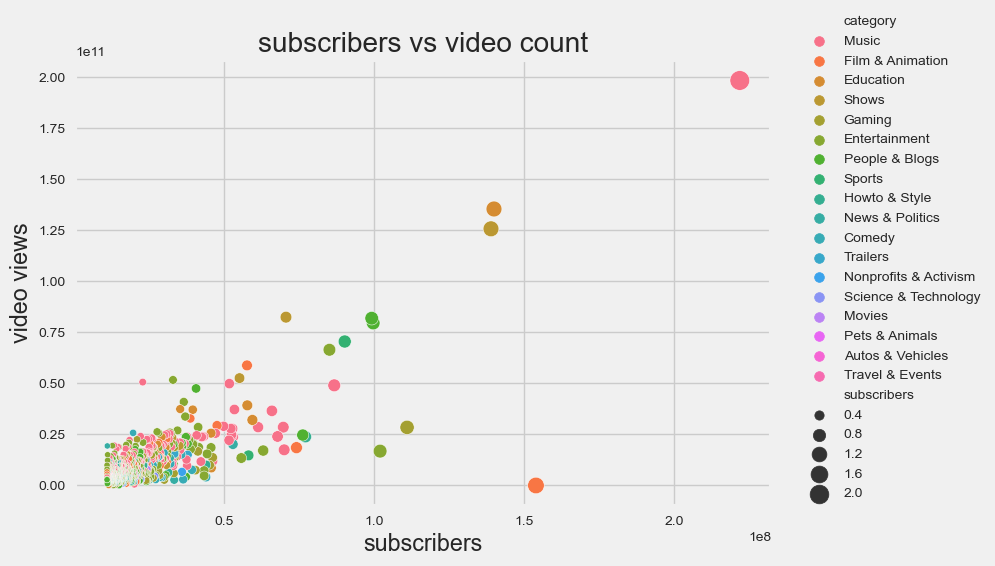

In [38]:
scatter2 = sns.scatterplot(x = df_final['subscribers'], y = df_final['video views'], data = df_final, hue = 'category', legend = True, size= "subscribers", sizes=(20,200))
plt.legend(loc = (1.04, 0))
scatter2.set_title("subscribers vs video count")

# there appears to be a relationship between the two variables

correlation  matrix

In [39]:
#correlation matrix
cor_matrix = df_final.corr()
round(cor_matrix, 2)

# values don't appear to be very correlated

rank  subscribers  video views  video count  started
rank         1.00        -0.65        -0.46        -0.05     0.14
subscribers -0.65         1.00         0.79         0.07    -0.13
video views -0.46         0.79         1.00         0.15    -0.16
video count -0.05         0.07         0.15         1.00    -0.13
started      0.14        -0.13        -0.16        -0.13     1.00

heatmap to show pairwise correlation

In [40]:
# f, ax = plt.subplots(figsize = (10,10))
# sns.heatmap(cor_matrix, annot = True, linewidth = 5, fmt = '.1f', ax = ax)

Text(0.5, 1.0, 'heatmap showing correlation ')

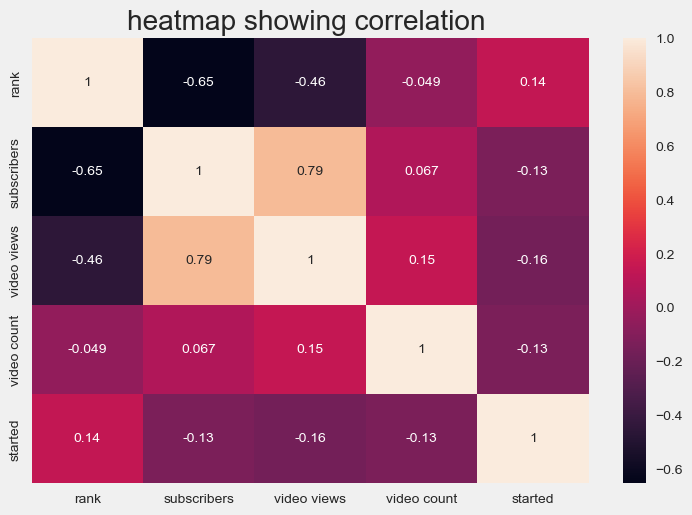

In [41]:

sns.heatmap(cor_matrix, annot = True, annot_kws={'size': 10})
plt.title('heatmap showing correlation ')
